# Housing Trends from Zillow

Looking to find the most expensive metro areas by median home price in the US.

__Context__:
Zillow has a lot of data about housing prices in America.

__Content__:
Data about housing prices and rental prices broken down according to city and state and number of bedrooms. More detail can be found at https://www.zillow.com/research/data/ and at https://www.zillow.com/research/home-sales-methodology-7733/.

__Acknowledgements__:
The data was downloaded from https://www.zillow.com/research/data/. Banner photo from Ian Keefe on Unsplash. Dataset license described at https://www.zillow.com/research/data/.

## The Data

Home prices have been a hot-button issue in terms of the greater health of the US economy for several decades.  Following median home prices, home builds, home purchases, home loan interest rates, is talked about reguarly by all sorts of market analysts.  

Rises prices of construction, in labor an materials, are chasing more and more people out of participating in this market.  With the wealth of data available we can do our own analysis and see where the most affordable US metropolitan areas are, should one be interested in lowering costs.  


In [1]:
#data organization and upload
import numpy as np
import pandas as pd

#visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#setting filter warnings to ignore to keep our notebook clean
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the data from csv into pandas dataframe
data = pd.read_csv("City_Zhvi_2bedroom.csv")

In [3]:
#reviewing the dtaframe to ensure it loaded properly
data.head()

,Unnamed: 0,RegionID,RegionName,State,Metro,CountyName,SizeRank,2008-01,2008-02,2008-03,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,0,6181,New York,NY,New York-Newark-Jersey City,Queens County,1,576827.0,576551.0,575294.000000,...,755775.000000,755544.000000,755377.333333,755510.333333,754488.666667,753482.666667,751084.000000,747943.000000,745139.333333,743173.333333
1,1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,NaN,...,599677.666667,598162.333333,598823.000000,600231.000000,603184.333333,607904.666667,613860.000000,620111.666667,623957.333333,626501.666667
2,2,39051,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,97050.0,96793.5,96671.666667,...,135923.000000,136778.666667,137111.666667,137613.666667,138303.000000,138913.333333,139524.000000,139964.666667,140836.000000,140799.000000
3,3,17426,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,NaN,NaN,NaN,...,226506.333333,226949.666667,227951.000000,228515.333333,228289.000000,227479.666667,226601.333333,225887.333333,225615.666667,225706.000000
4,4,6915,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,80354.0,80612.0,80738.666667,...,116293.333333,117501.000000,118332.666667,118989.666667,119935.333333,120798.000000,121715.000000,122682.000000,122805.666667,122679.000000


In [4]:
#create clean dataframe by removing unneeded columns
columns = list(data.columns)
#removing unnamed column
columns = columns[1:]

In [5]:
#define new df
df =data[columns]
#checking new df
df.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2008-01,2008-02,2008-03,2008-04,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,6181,New York,NY,New York-Newark-Jersey City,Queens County,1,576827.0,576551.0,575294.000000,573466.333333,...,755775.000000,755544.000000,755377.333333,755510.333333,754488.666667,753482.666667,751084.000000,747943.000000,745139.333333,743173.333333
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,NaN,NaN,...,599677.666667,598162.333333,598823.000000,600231.000000,603184.333333,607904.666667,613860.000000,620111.666667,623957.333333,626501.666667
2,39051,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,97050.0,96793.5,96671.666667,96087.000000,...,135923.000000,136778.666667,137111.666667,137613.666667,138303.000000,138913.333333,139524.000000,139964.666667,140836.000000,140799.000000
3,17426,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,NaN,NaN,NaN,213804.000000,...,226506.333333,226949.666667,227951.000000,228515.333333,228289.000000,227479.666667,226601.333333,225887.333333,225615.666667,225706.000000
4,6915,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,80354.0,80612.0,80738.666667,80994.333333,...,116293.333333,117501.000000,118332.666667,118989.666667,119935.333333,120798.000000,121715.000000,122682.000000,122805.666667,122679.000000


In [6]:
#basic df summary stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19552 entries, 0 to 19551
Columns: 149 entries, RegionID to 2019-11
dtypes: float64(143), int64(2), object(4)
memory usage: 22.2+ MB


In [7]:
#number of  cities/regions in dataset
len(df.RegionID.unique())

19552

In [8]:
#number of MSAs (metropolitan service areas) in dataset
len(df.Metro.unique())

850

The file from Zillow represents monthly home price data from Jan 2008 to November 2019.  

This is a total of 142 months.  There are 19,551 city regions and 850 metro areas.

The data set is a little messy.  The first step is to deal with the NAN values un the MSA column.

In [9]:
#creating a df copy so we don't lose the original data if we need it
metro_df = df.copy()
metro_df.fillna(0,inplace=True)

In [10]:
#tallying NANs in string columns
metro_df.iloc[:,:6].isna().sum()

RegionID      0
RegionName    0
State         0
Metro         0
CountyName    0
SizeRank      0
dtype: int64

In [11]:
metro_df.Metro[metro_df.Metro == 0].count()

4350

In [12]:
#printing the data loss if we were to remove all NANs
print("{}% loss of data".format(round((4350/19551)*100,2)))

22.25% loss of data


Ouch!  There are a number of unincorporated areas in the US, and even cities that are not included in a MSA, believe it or not.  The ask is directly about MSA prices as well.  Given these two facts, I think its the right move to drop the NANs out of the working DF.  These areas can be dealt with at a later date.


In [13]:
#droping rows where msa is NAN
metro_df.drop(metro_df.index[metro_df.Metro ==0], inplace = True)


In [14]:
#reviewing DF
metro_df.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2008-01,2008-02,2008-03,2008-04,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,6181,New York,NY,New York-Newark-Jersey City,Queens County,1,576827.0,576551.0,575294.000000,573466.333333,...,755775.000000,755544.000000,755377.333333,755510.333333,754488.666667,753482.666667,751084.000000,747943.000000,745139.333333,743173.333333
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,0.0,0.0,0.000000,0.000000,...,599677.666667,598162.333333,598823.000000,600231.000000,603184.333333,607904.666667,613860.000000,620111.666667,623957.333333,626501.666667
2,39051,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,97050.0,96793.5,96671.666667,96087.000000,...,135923.000000,136778.666667,137111.666667,137613.666667,138303.000000,138913.333333,139524.000000,139964.666667,140836.000000,140799.000000
3,17426,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,0.0,0.0,0.000000,213804.000000,...,226506.333333,226949.666667,227951.000000,228515.333333,228289.000000,227479.666667,226601.333333,225887.333333,225615.666667,225706.000000
4,6915,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,80354.0,80612.0,80738.666667,80994.333333,...,116293.333333,117501.000000,118332.666667,118989.666667,119935.333333,120798.000000,121715.000000,122682.000000,122805.666667,122679.000000


In [15]:
#checking to see if we still have NANs
metro_df.iloc[:,:6].isna().sum()

RegionID      0
RegionName    0
State         0
Metro         0
CountyName    0
SizeRank      0
dtype: int64

In [16]:
#getting rid of region id since it's not useful to the analysis
metro_df = metro_df.iloc[:,1:]

In [17]:
metro_df.head()

,RegionName,State,Metro,CountyName,SizeRank,2008-01,2008-02,2008-03,2008-04,2008-05,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,New York,NY,New York-Newark-Jersey City,Queens County,1,576827.0,576551.0,575294.000000,573466.333333,569521.0,...,755775.000000,755544.000000,755377.333333,755510.333333,754488.666667,753482.666667,751084.000000,747943.000000,745139.333333,743173.333333
1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,0.0,0.0,0.000000,0.000000,0.0,...,599677.666667,598162.333333,598823.000000,600231.000000,603184.333333,607904.666667,613860.000000,620111.666667,623957.333333,626501.666667
2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,97050.0,96793.5,96671.666667,96087.000000,95375.0,...,135923.000000,136778.666667,137111.666667,137613.666667,138303.000000,138913.333333,139524.000000,139964.666667,140836.000000,140799.000000
3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,0.0,0.0,0.000000,213804.000000,215913.0,...,226506.333333,226949.666667,227951.000000,228515.333333,228289.000000,227479.666667,226601.333333,225887.333333,225615.666667,225706.000000
4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,80354.0,80612.0,80738.666667,80994.333333,80945.0,...,116293.333333,117501.000000,118332.666667,118989.666667,119935.333333,120798.000000,121715.000000,122682.000000,122805.666667,122679.000000


In [18]:
#creating new empty df with custom column names
df_prices = pd.DataFrame(columns =['region', 'state', 'metro','size_rank','mean'])

In [19]:
#checking df was created properly
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 5 columns):
region       0 non-null object
state        0 non-null object
metro        0 non-null object
size_rank    0 non-null object
mean         0 non-null object
dtypes: object(5)
memory usage: 0.0+ bytes


In [20]:
#populating df
df_prices.region = metro_df.RegionName
df_prices.state = metro_df.State
df_prices.metro = metro_df.Metro
df_prices.size_rank = metro_df.SizeRank

In [21]:
#taking the average of prices over the whole time frame
means = []
for i in range(len(df_prices.region)):
    val = np.mean(metro_df.iloc[i,6:])
    means.append(val)
df_prices['mean'] = means

In [22]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15202 entries, 0 to 19551
Data columns (total 5 columns):
region       15202 non-null object
state        15202 non-null object
metro        15202 non-null object
size_rank    15202 non-null int64
mean         15202 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 712.6+ KB


We already have median values, but we're taking the mean of the median values.  In this case - we just did the calculation line by line.  The next step is to do the calculation again, but averaging all the cities/towns that are included in each Metro Area.  For example L.A. and Anaheim are both in the same metropolitan area in CA, so we'll need to take the mean of these values.

In [23]:
#creating a list of all the metro areas to iterate over
metros = list(df_prices.metro.unique())

In [24]:
#Empty dictionary that has each MSA with the mean of the home prices in all cities in the msa
metro_dict = {}
for msa in metros:        
    metro_dict[msa]= np.mean(df_prices[df_prices.metro==msa])

In [25]:
#checking the value of one MSA
metro_dict['New York-Newark-Jersey City']

size_rank      5893.636511
mean         314474.951721
dtype: float64

In [26]:
#previous cell also took into acount the size rank
#dropping sizerank out of the analysis
mean_metro = {}
#interating over new dictionary
for msa in metros:
    mean_metro[msa]= round(metro_dict[msa][1],2)

In [27]:
#checking the same MSA as before
mean_metro['New York-Newark-Jersey City']

314474.95

In [28]:
#generating a new df with only our updated means and the msa names
msa_price = pd.DataFrame(columns = ['MSA','MeanPrice'])

In [29]:
#populating the df
msa_price.MSA = mean_metro.keys()
msa_price.MeanPrice = mean_metro.values()

In [30]:
#reviewing the df
msa_price.head()

,MSA,MeanPrice
0,New York-Newark-Jersey City,314474.95
1,Los Angeles-Long Beach-Anaheim,369116.05
2,Houston-The Woodlands-Sugar Land,107003.34
3,Chicago-Naperville-Elgin,133582.97
4,San Antonio-New Braunfels,140443.56


In [31]:
#sorting a df by home price high to low
msa_mean_sort =msa_price.sort_values(by = ['MeanPrice'], ascending=False)

In [32]:
#resetting the index
msa_mean_sort.reset_index(inplace=True)
#removing the duplicate index column
msa_mean_sort.drop(columns = ['index'], inplace = True)

In [33]:
#reviewing the df
msa_mean_sort.head(10)

,MSA,MeanPrice
0,San Jose-Sunnyvale-Santa Clara,643333.35
1,Port St. Lucie,574089.90
2,Vineyard Haven,545349.88
3,Kapaa,499137.71
4,San Francisco-Oakland-Hayward,457746.34
5,Kahului-Wailuku-Lahaina,429485.62
6,Santa Maria-Santa Barbara,423260.87
7,Los Angeles-Long Beach-Anaheim,369116.05
8,Urban Honolulu,354167.97
9,Salinas,341460.01


In [34]:
#setting the plot styling with seaborn
sns.set_style('whitegrid')

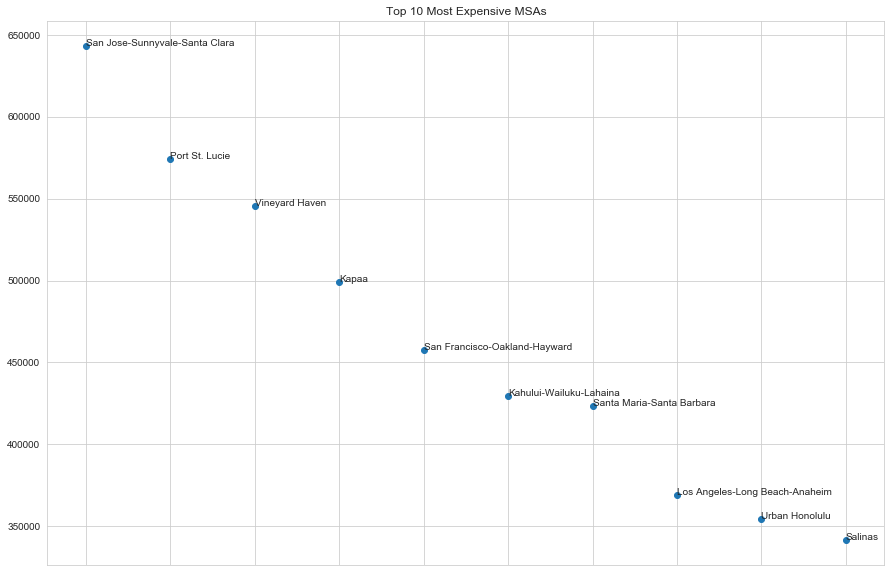

In [35]:
#Plotting the top 10 most expesive home prices
fig, ax = plt.subplots(figsize=(15,10))

#using a scatter plot, with one point representing the average price in a city
x = msa_mean_sort.MSA[:10]
y = msa_mean_sort.MeanPrice[:10]
labels =x
ax.scatter(x, y,label =labels)

#labeling each data point
for i, txt in enumerate(labels):
    ax.annotate(txt, (x[i], y[i]))
#since the data points are labeled, take out the x-axis labels    
ax.xaxis.set_ticklabels([])

ax.set_title('Top 10 Most Expensive MSAs')
plt.show()

This dataset is not that surprising.  The states that each of these MSAs are located in make sense.
  - 5 in CA
  - 3 in HI
  - 1 in MA (Martha's vineyard)
  - 1 in FL (Jupiter island)
 
I was surprised that this does not include New York City, but the home prices in the whole MSA are included.  The NYC MSA also includes Newark, where home prices are considerably less than Manhattan.  
 
 
The next visual will essentially do the same thing but will also  weight the datapoints on the size of the city rank.

In [36]:
#extracting the sizerank from the old dictionary
s = [metro_dict[msa][0]for msa in labels]

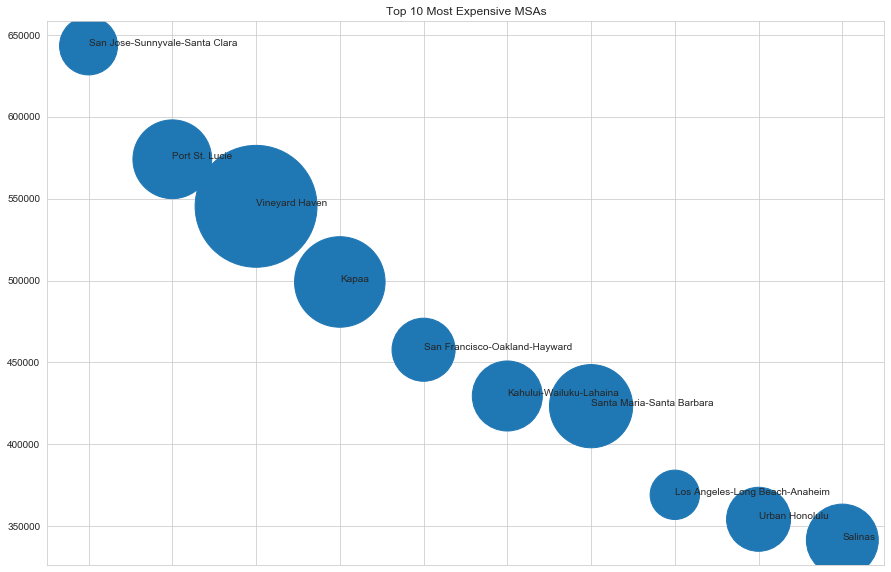

In [37]:
fig, ax = plt.subplots(figsize=(15,10))
#adding a value for s with 'size' the dots
ax.scatter(x, y,label =labels, s=s)
for i, txt in enumerate(labels):
    ax.annotate(txt, (x[i], y[i]))
ax.xaxis.set_ticklabels([])
ax.set_title('Top 10 Most Expensive MSAs')
plt.show()

This is a really impressive visual, though since rank is a higher value for lower population density, the graph is a little counter intuitive.  San Jose, which includes Silicon Valley, has on average the highest median home price in the US for the last 10 years, at over 650k for an average median price.  Given the wealth in the area I can't say that I am surprised by this finding either.  As a contrast the average median price in the MSA where I grew up is only $122k and the MSA where I currently reside is 261k.



My next set of visuals is taking a look at a few individual states to see some price trends and how they behave over the period.

In [38]:
#creating a df just for NY metro areas
ny_df = df[df.State == 'NY']
ny_df.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2008-01,2008-02,2008-03,2008-04,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,6181,New York,NY,New York-Newark-Jersey City,Queens County,1,576827.0,576551.0,575294.000000,573466.333333,...,755775.000000,755544.000000,755377.333333,755510.333333,754488.666667,753482.666667,751084.000000,747943.000000,745139.333333,743173.333333
86,17222,Buffalo,NY,Buffalo-Cheektowaga-Niagara Falls,Erie County,87,57165.0,56861.5,56917.666667,56842.000000,...,85312.666667,86351.333333,87165.666667,87838.333333,88679.666667,89440.333333,90333.000000,90891.000000,91291.000000,91866.666667
129,34937,Yonkers,NY,New York-Newark-Jersey City,Westchester County,130,491565.0,488515.5,484546.666667,478239.666667,...,468635.000000,469873.666667,472966.333333,477067.333333,479291.000000,478921.666667,477858.000000,478943.000000,477935.000000,476596.000000
210,7353,Syracuse,NY,Syracuse,Onondaga County,211,71542.0,71499.0,71623.000000,71693.000000,...,79226.666667,79167.000000,79653.666667,80588.666667,81468.333333,82227.000000,82613.000000,82950.000000,83448.333333,83812.666667
240,395433,Ramapo,NY,New York-Newark-Jersey City,Rockland County,241,326112.0,325179.0,325396.000000,324823.333333,...,301574.000000,302956.000000,303223.666667,302449.333333,300735.000000,300266.000000,301646.666667,303026.333333,302821.666667,302004.333333


In [39]:
#dropping unneeded columns
ny_df.drop(columns = ['RegionID','CountyName','SizeRank'], inplace = True)
ny_df.head()

,RegionName,State,Metro,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,New York,NY,New York-Newark-Jersey City,576827.0,576551.0,575294.000000,573466.333333,569521.000000,565227.333333,559953.000000,...,755775.000000,755544.000000,755377.333333,755510.333333,754488.666667,753482.666667,751084.000000,747943.000000,745139.333333,743173.333333
86,Buffalo,NY,Buffalo-Cheektowaga-Niagara Falls,57165.0,56861.5,56917.666667,56842.000000,57070.666667,56748.333333,56551.000000,...,85312.666667,86351.333333,87165.666667,87838.333333,88679.666667,89440.333333,90333.000000,90891.000000,91291.000000,91866.666667
129,Yonkers,NY,New York-Newark-Jersey City,491565.0,488515.5,484546.666667,478239.666667,474467.666667,472677.333333,472316.333333,...,468635.000000,469873.666667,472966.333333,477067.333333,479291.000000,478921.666667,477858.000000,478943.000000,477935.000000,476596.000000
210,Syracuse,NY,Syracuse,71542.0,71499.0,71623.000000,71693.000000,71660.333333,71301.666667,70886.000000,...,79226.666667,79167.000000,79653.666667,80588.666667,81468.333333,82227.000000,82613.000000,82950.000000,83448.333333,83812.666667
240,Ramapo,NY,New York-Newark-Jersey City,326112.0,325179.0,325396.000000,324823.333333,323502.333333,322361.000000,320880.666667,...,301574.000000,302956.000000,303223.666667,302449.333333,300735.000000,300266.000000,301646.666667,303026.333333,302821.666667,302004.333333


In [40]:
#looking to see how many regions/cities are in a single MSA
ny_df[ny_df.Metro== 'New York-Newark-Jersey City']

,RegionName,State,Metro,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,New York,NY,New York-Newark-Jersey City,576827.0,576551.0,575294.000000,573466.333333,569521.000000,565227.333333,559953.000000,...,7.557750e+05,7.555440e+05,7.553773e+05,7.555103e+05,7.544887e+05,7.534827e+05,7.510840e+05,7.479430e+05,7.451393e+05,7.431733e+05
129,Yonkers,NY,New York-Newark-Jersey City,491565.0,488515.5,484546.666667,478239.666667,474467.666667,472677.333333,472316.333333,...,4.686350e+05,4.698737e+05,4.729663e+05,4.770673e+05,4.792910e+05,4.789217e+05,4.778580e+05,4.789430e+05,4.779350e+05,4.765960e+05
240,Ramapo,NY,New York-Newark-Jersey City,326112.0,325179.0,325396.000000,324823.333333,323502.333333,322361.000000,320880.666667,...,3.015740e+05,3.029560e+05,3.032237e+05,3.024493e+05,3.007350e+05,3.002660e+05,3.016467e+05,3.030263e+05,3.028217e+05,3.020043e+05
571,Town of Poughkeepsie,NY,New York-Newark-Jersey City,230853.0,231544.5,230776.666667,229783.000000,226573.666667,223543.000000,220749.666667,...,1.857393e+05,1.867830e+05,1.873297e+05,1.887137e+05,1.891203e+05,1.905240e+05,1.911550e+05,1.917490e+05,1.928543e+05,1.941273e+05
588,New Rochelle,NY,New York-Newark-Jersey City,495862.0,493162.5,490203.000000,484698.333333,480762.666667,478346.666667,476762.000000,...,5.349423e+05,5.407467e+05,5.441507e+05,5.468140e+05,5.455360e+05,5.430740e+05,5.429860e+05,5.436177e+05,5.430380e+05,5.389690e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18211,Verplanck,NY,New York-Newark-Jersey City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.976213e+05,2.960080e+05,2.927187e+05,2.901563e+05,2.899300e+05,2.917327e+05,2.944130e+05,2.972883e+05,2.983687e+05,3.001297e+05
18423,Orient,NY,New York-Newark-Jersey City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.797783e+05,6.887870e+05,6.947880e+05,6.960927e+05,6.962807e+05,6.911200e+05,6.899907e+05,6.874257e+05,6.870420e+05,6.821217e+05
18667,Sagaponack,NY,New York-Newark-Jersey City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.325605e+06,2.320907e+06,2.335261e+06,2.365630e+06,2.393900e+06,2.409151e+06,2.402383e+06,2.382505e+06,2.354725e+06,2.323457e+06
18818,Town Of Blooming Grove,NY,New York-Newark-Jersey City,200763.0,201189.5,200568.666667,199713.000000,198366.333333,197294.666667,196349.000000,...,1.569273e+05,1.593737e+05,1.615163e+05,1.633740e+05,1.646947e+05,1.650527e+05,1.658447e+05,1.674443e+05,1.698850e+05,1.722253e+05


In [41]:
#creating empty dictionary for ny
ny_metros = {}

#filling in the dictionary with empty nested dictionary where the key is a msa
for m in ny_df.Metro.unique():
    ny_metros[m]= {}

In [42]:
#making a column list for time labels
cols = ny_df.columns[3:]

In [43]:
#filling in the empty nested dictionary with the mean of all the cities/regions in each msa
for msa in ny_metros.keys():
    ny_metros[msa]= np.mean(ny_df[(ny_df.Metro == msa)])

In [44]:
#removing the nans in a dict where keys are strings
ny_metros = {k: ny_metros[k] for k in ny_metros if type(k) is str}

In [45]:
#check on the keys before plotting the data
ny_metros.keys()


dict_keys(['New York-Newark-Jersey City', 'Buffalo-Cheektowaga-Niagara Falls', 'Syracuse', 'Albany-Schenectady-Troy', 'Rochester', 'Utica-Rome', 'Binghamton', 'Ithaca', 'Jamestown-Dunkirk-Fredonia', 'Plattsburgh', 'Glens Falls', 'Auburn', 'Kingston', 'Amsterdam', 'Batavia', 'Elmira', 'Cortland', 'Oneonta', 'Corning', 'Olean', 'Gloversville', 'Malone', 'Seneca Falls', 'Hudson', 'Ogdensburg-Massena', 'Watertown-Fort Drum'])

All the dictionary processing was done to make creating the below plots easy and clean.  First, there is a visual of the MSA prices over time.  Second, we'll look at three Metro Areas and look at the distribution of prices over time.

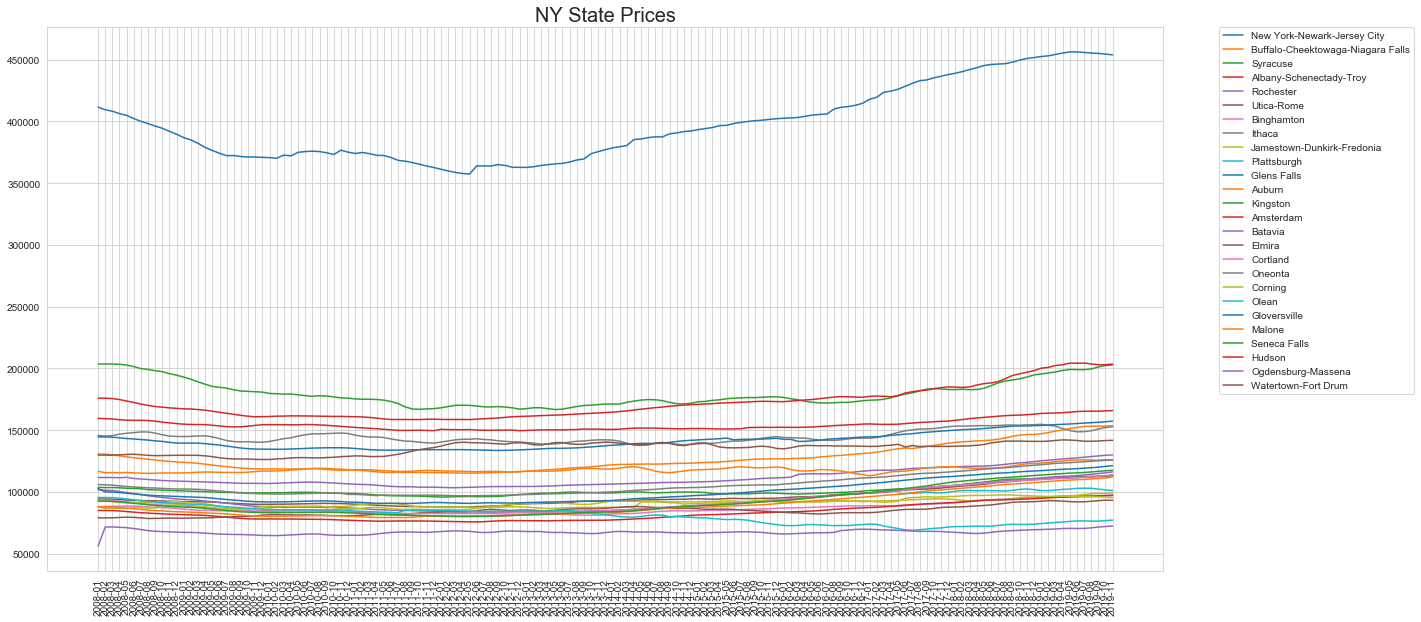

In [46]:
#creating the figure and subplots
fig, ax = plt.subplots(figsize=(20,10))
#variable containing the dict. keys
keys1 = ny_metros.keys()
#looping over the keys to plot a line that represents mean price over time by msa
for msa in keys1:
    ax.plot(ny_metros[msa].keys(), ny_metros[msa],label = msa)
#setting title
ax.set_title('NY State Prices', fontsize = 20)
#setting x-axis labels
ax.xaxis.set_ticklabels(cols)
#rotating labels for readability
plt.xticks(rotation=90)
#showing the legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)
#display plot
plt.show()

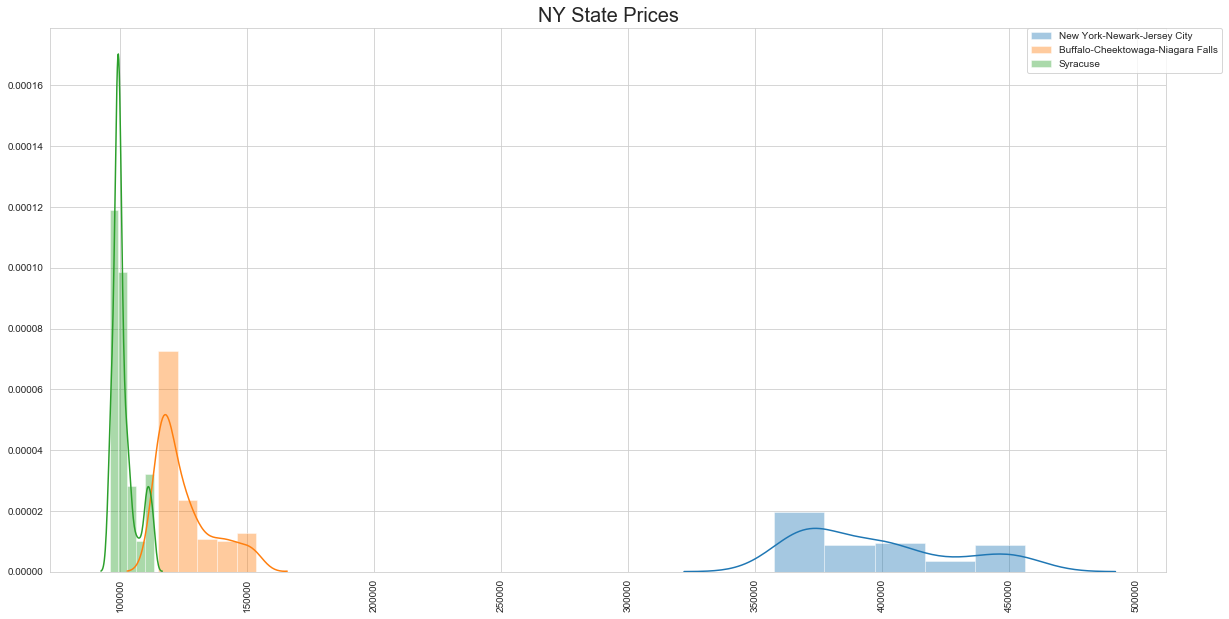

In [47]:
#creating the figure and subplots
fig, ax = plt.subplots(figsize=(20,10))
#list of 3 metros
keys_topny =list(keys1)[:3]
#looping over top metros to plto a distplot for each
for msa in keys_topny:
    sns.distplot(ny_metros[msa],bins =5 ,label = msa)
#setting title
ax.set_title('NY State Prices', fontsize = 20)
#rotating labels for readability
plt.xticks(rotation=90)
#showing the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)
#display plot
plt.show()

Apparently, New York city is really expensive.  In both plots you can see that the prices of homes in NYC are much higher than some of the other larger MSAs in New York State.  

What about another state?  Are larger citites more spread out than the more secondary msa's in the state?

Visuals are handy in being able to take these quick insights from the data.  We have the code written so we can use it again for Colorado.

In [48]:
#reusing the code from above with Colorado instead of New York State
co_df = df[df.State == 'CO']
co_df.drop(columns = ['RegionID','CountyName','SizeRank'], inplace = True)
co_df.head()

,RegionName,State,Metro,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
23,Denver,CO,Denver-Aurora-Lakewood,219988.0,219087.5,218215.666667,216358.333333,214613.000000,213274.000000,211813.333333,...,400997.333333,400935.333333,400096.333333,399211.000000,398731.666667,398377.666667,398558.666667,398069.000000,397395.333333,396848.333333
42,Colorado Springs,CO,Colorado Springs,153851.0,153720.5,153041.666667,151886.333333,150644.333333,149570.666667,148789.666667,...,218805.666667,219590.666667,219785.666667,219854.333333,220688.000000,222164.000000,224295.666667,226873.666667,229103.000000,231039.666667
55,Aurora,CO,Denver-Aurora-Lakewood,152810.0,151953.5,150496.333333,148000.333333,145930.666667,144868.333333,144015.666667,...,275851.000000,277073.000000,278216.000000,278253.666667,278120.000000,277362.666667,276294.666667,276063.000000,276143.333333,277656.666667
144,Fort Collins,CO,Fort Collins,176749.0,176124.0,175961.000000,175294.333333,174810.666667,174285.333333,174048.000000,...,315905.000000,317611.000000,317749.000000,317195.333333,315731.666667,315606.333333,315100.666667,315437.000000,314599.333333,315011.333333
184,Pueblo,CO,Pueblo,96272.0,95723.5,95362.000000,94445.333333,93767.666667,93078.000000,92523.333333,...,121806.666667,122742.000000,123785.333333,124496.000000,125312.333333,125696.666667,125185.666667,125131.333333,125248.000000,126620.666667


In [49]:
#reusing code from above
#if we wanted to do this more than twice we could set a function
co_metros = {}
for m in co_df.Metro.unique():
    co_metros[m]= {}
for msa in co_metros.keys():
    co_metros[msa]= np.mean(co_df[(co_df.Metro == msa)])
co_metros = {k: co_metros[k] for k in co_metros if type(k) is str}

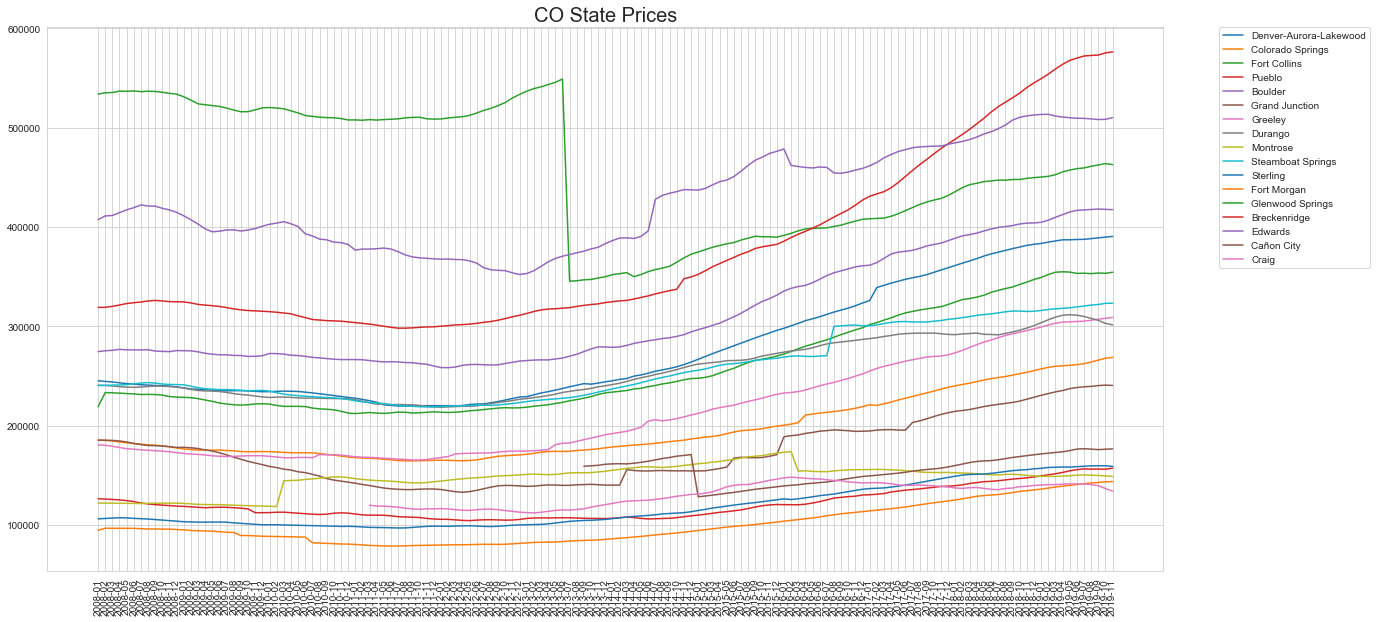

In [50]:
#plotting for CO
fig, ax = plt.subplots(figsize=(20,10))
keys2 = co_metros.keys()

for msa in keys2:
    ax.plot(co_metros[msa].keys(), co_metros[msa],label = msa)
ax.set_title('CO State Prices', fontsize = 20)
ax.xaxis.set_ticklabels(cols)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)
plt.show()

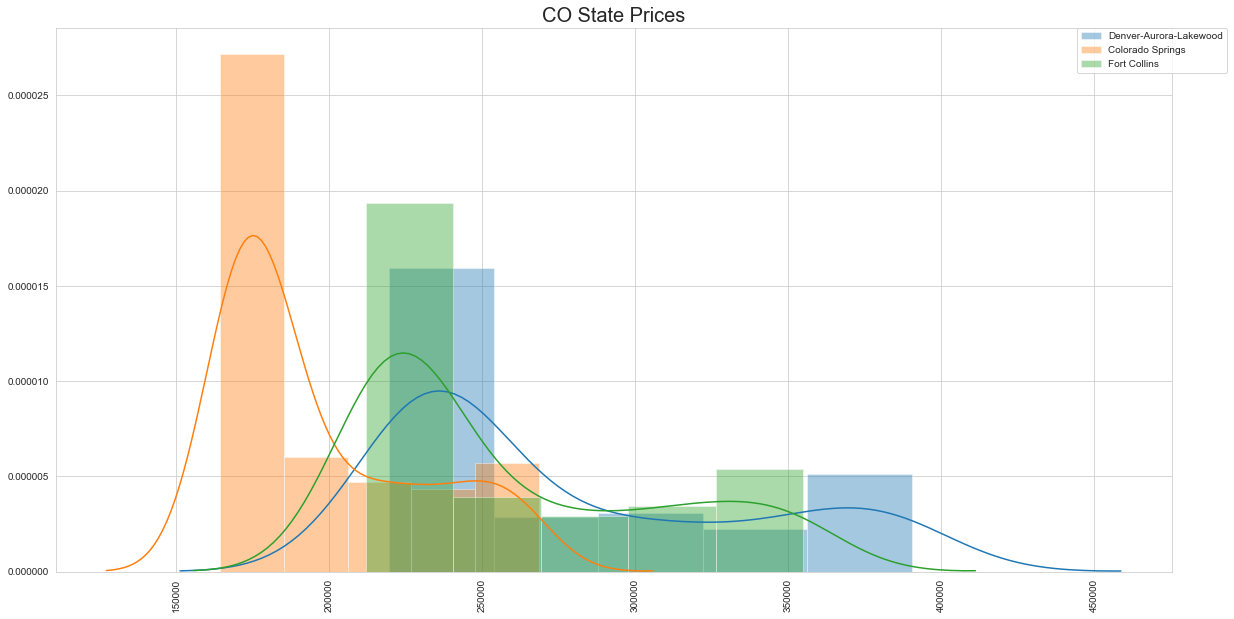

In [51]:
fig, ax = plt.subplots(figsize=(20,10))
keys_topco =list(keys2)[:3]
for msa in keys_topco:
    sns.distplot(co_metros[msa],bins =5 ,label = msa)
ax.set_title('CO State Prices', fontsize = 20)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)
plt.show()

CO is very different in NY in this case.  It does look like the Denver msa is a more spread out than the other Msa's in CO, however, New York City is likely an outlier, since it is one of the biggest cities (and tehrefore metropolitan areas) in the world. 

Dissecting the information in these plots, one must remember what you are looking at.  These plots are average home prices by metropolitan area over time.  So with the distplots, we're looking at the dispersion of the mean for each msa by month over roughly ten years.  

As a former real estate analyst I think this is a very interesting that the dispersion in different metropolitan areas within a state is clearly very different.  For example in New York State over the last ten years the mean home price in Syracuse clearly did not vary much, compared to New York City.  This is especially interesting given that the financial crises is included in the data set.  You can also see some of that in the pervious visual that plots the mean over time.  You can see the steepness of the curve or New York is greater than the slopes of the other regions in NYC.


What about state by state averages side by side?  The begining of the data set is very near to the financial crisis, but included in the time frame is the 'recovery'.  Roughly five years after the crisis the real estate markets recovered and in some places boomed. Let's see if the data supports this.


In [52]:
#create lsit of state abbreviations then sorting to ensure everything looks good
state = metro_df.State.unique()
sorted(state)

['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [53]:
#create empty dictionary
states_metros = {}
#setting the state as a key in the dict, then makeing the state = a nested dict
for s in state:
    states_metros[s]= {}
#adding data to the nested dict, usign the mean by state for each time frame
for st in states_metros.keys():
    states_metros[st]= np.mean(metro_df[(metro_df.State == st)])
#getting rid of the Nans stored as text
states_metros = {k: states_metros[k] for k in states_metros if type(k) is str}

In [96]:
#looking at the dictionary to make sure it's populated
states_metros

{'NY': SizeRank      9414.086408
 2008-01     152392.174757
 2008-02     155928.879612
 2008-03     155707.167961
 2008-04     155102.579126
                 ...      
 2019-07     212025.814887
 2019-08     212081.874434
 2019-09     212173.699029
 2019-10     212260.986731
 2019-11     212333.923301
 Length: 144, dtype: float64, 'CA': SizeRank      5739.380403
 2008-01      70932.641210
 2008-02      85375.220461
 2008-03      90808.781700
 2008-04      90688.170269
                 ...      
 2019-07     465500.037944
 2019-08     465974.858309
 2019-09     466807.009126
 2019-10     467732.174832
 2019-11     468443.450528
 Length: 144, dtype: float64, 'TX': SizeRank      8145.730000
 2008-01      66356.236667
 2008-02      70947.115833
 2008-03      71206.269722
 2008-04      71136.865278
                 ...      
 2019-07     152334.692222
 2019-08     152842.849444
 2019-09     153503.590000
 2019-10     154024.902778
 2019-11     154440.389444
 Length: 144, dtype: float64, 'IL

In [116]:
#removing size rank from the dictionary and checking again
for st in states_metros.keys():
    del states_metros[st]['SizeRank']
states_metros

{'NY': 2008-01    152392.174757
 2008-02    155928.879612
 2008-03    155707.167961
 2008-04    155102.579126
 2008-05    156508.433657
                ...      
 2019-07    212025.814887
 2019-08    212081.874434
 2019-09    212173.699029
 2019-10    212260.986731
 2019-11    212333.923301
 Length: 143, dtype: float64, 'CA': 2008-01     70932.641210
 2008-02     85375.220461
 2008-03     90808.781700
 2008-04     90688.170269
 2008-05     92231.111431
                ...      
 2019-07    465500.037944
 2019-08    465974.858309
 2019-09    466807.009126
 2019-10    467732.174832
 2019-11    468443.450528
 Length: 143, dtype: float64, 'TX': 2008-01     66356.236667
 2008-02     70947.115833
 2008-03     71206.269722
 2008-04     71136.865278
 2008-05     71220.130000
                ...      
 2019-07    152334.692222
 2019-08    152842.849444
 2019-09    153503.590000
 2019-10    154024.902778
 2019-11    154440.389444
 Length: 143, dtype: float64, 'IL': 2008-01     51788.785812
 2008

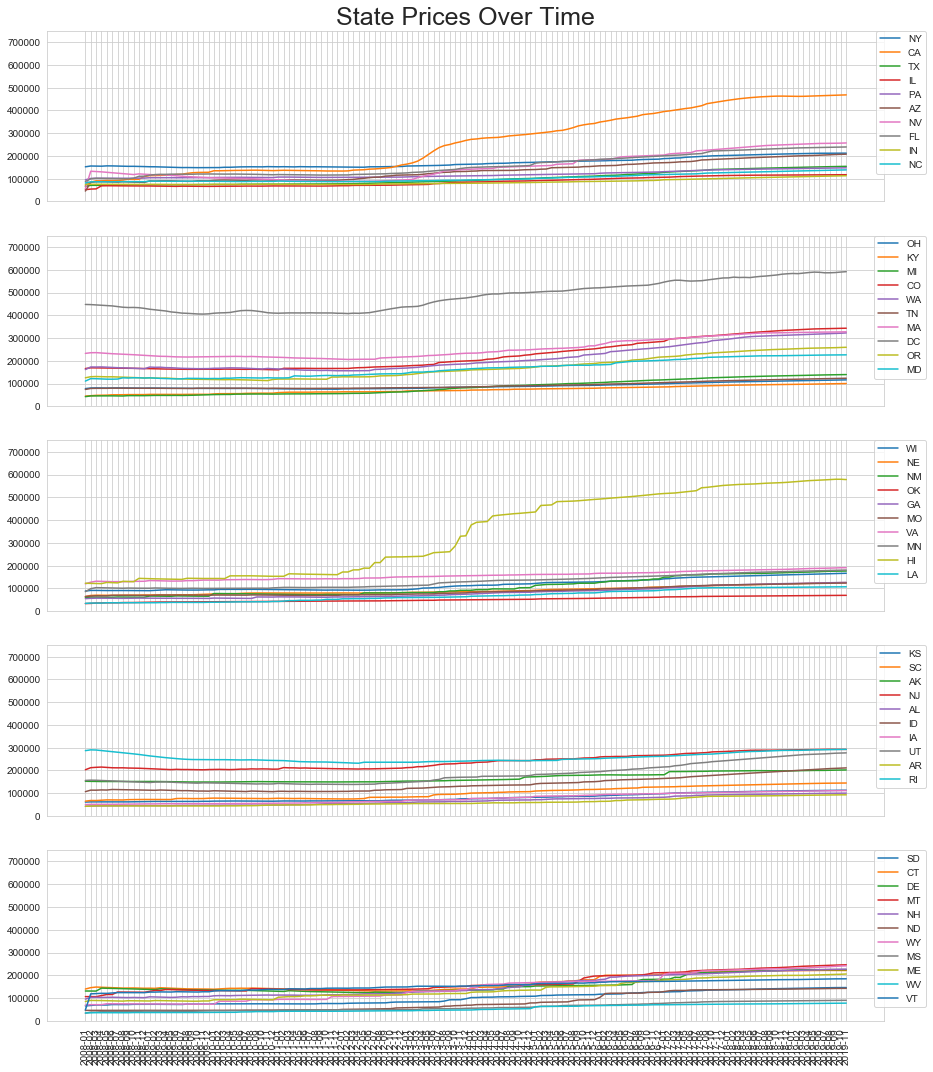

In [141]:
#plotting for state by state comparison
fig, (ax1, ax2,ax3, ax4, ax5) = plt.subplots(nrows= 5, ncols =1,figsize=(15,10))
#adjusting plot padding
plt.subplots_adjust(top = 1.5)

X = list(states_metros['NY'].keys())

#creating state blocks for easier viewing 
sts1 = list(states_metros.keys())[:10]
sts2 = list(states_metros.keys())[10:20]
sts3 = list(states_metros.keys())[20:30]
sts4 = list(states_metros.keys())[30:40]
sts5 = list(states_metros.keys())[40:]

#list of state blocks

cols2= metro_df.columns[5:]

#looping over states in each group to create separate plots for readability
#using separate loops as the attributes in each plot are not unitform
for st in sts1:
    ax1.plot(states_metros[st].keys(), states_metros[st],label = st)
    ax1.legend(bbox_to_anchor=(1.05, 1),loc='best', borderaxespad=0.)
    ax1.set_ylim( ymin=0, ymax=750000)
    ax1.xaxis.set_ticklabels([])
    ax1.set_title("State Prices Over Time", fontsize = 25)
    
for st in sts2:
    ax2.plot(states_metros[st].keys(), states_metros[st],label = st)
    ax2.legend(bbox_to_anchor=(1.05, 1),loc='best', borderaxespad=0.)
    ax2.set_ylim( ymin=0, ymax=750000)
    ax2.xaxis.set_ticklabels([])
    
for st in sts3:
    ax3.plot(states_metros[st].keys(), states_metros[st],label = st)
    ax3.legend(bbox_to_anchor=(1.05, 1),loc='best', borderaxespad=0.)
    ax3.set_ylim( ymin=0, ymax=750000)
    ax3.xaxis.set_ticklabels([])
    
for st in sts4:
    ax4.plot(states_metros[st].keys(), states_metros[st],label = st)
    ax4.legend(bbox_to_anchor=(1.05, 1),loc='best', borderaxespad=0.)
    ax4.set_ylim( ymin=0, ymax=750000)
    ax4.xaxis.set_ticklabels([])
    
for st in sts5:
    ax5.plot(states_metros[st].keys(), states_metros[st],label = st)
    ax5.legend(bbox_to_anchor=(1.05, 1),loc='best', borderaxespad=0.)
    ax5.set_ylim( ymin=0, ymax=750000)
    ax5.xaxis.set_ticklabels(cols2)
    
plt.xticks(rotation=90)

plt.show()

Take careful note of the y axes - they've been calibrated to be the same.  The top plot includes CA (That includes the San Jose MSA which is not only one of the highest median home prices but also one of the fastest growing).  You can see the jump in CA toward the end of 2012.  The same time frame saw a jump in median home prices in many states, this is roughly 5 years after the Financial Crisis and accepted as the period of recover.


We've created several plots in this notebook, all of which describe the changes in median home prices in a different way.  We can easily see trends, look at the highest priced MSAs, and review the changes over time.  

### If I Had More Time..

I would take income data as well and contrast the Area Median Income (AMI) with the Average Median Home Price to determine the true 'expensiveness' of a metropolitan area. Unfortunately the AMI data is difficult to find when you are not an institution subscribing to expensive data sources. To move forward, either city by city income data or per capita (instead of household) data could be used to approximate AMI. Additionally, I could reassess the data and include the NANs in the state by state analysis as they are part of the state though not necessarily part of an MSA


## Process Summary

__1__ Import necessary libraries; Pandas, Numpy, Matplot, and Searborn

__2__ Load in the data from csv file into Pandas

__3__ Clean the data and explore basic statistics

__4__ Address NAN values

__5__ Calculating averages for median prices

__6__ Collapse data into 10 year Averages by MSA

__7__ Create the first plot of the series by graphing the most expensive MSAs

__8__ Create the second plot by weighting the most expensive MSAs by the size rank

__9__ Return to full, cleaned dataset in order to create subset for viewing NY over time

__10__ Plotting the median home price by MSA over time for NY

__11__ Plotting the distplot of home prices in NY for the 3 most expensive MSAs in NY

__12__ Repeating the NY process with another state, CO

__13__ Return again to full, cleaned sataset to plot the average prices by state over time

__14__ Explaining next steps

__15__ Process summary